Math 5750/6880: Mathematics of Data Science \
Project 4

# 1. Exploratory Analysis

Use the following code to download the dataset from
[https://www.kaggle.com/code/mineshjethva/eda-pulsedb/notebook](https://www.kaggle.com/code/mineshjethva/eda-pulsedb/notebook). The dataset is described in the paper [https://doi.org/10.3389/fdgth.2022.1090854](https://doi.org/10.3389/fdgth.2022.1090854).

I would recommend saving the data files to a google drive (or your local machine) so that you don't have to download them again. Note that the 5 data files correspond to the 5 columns in Table 4 of the paper.


In [ ]:
# download the data from kagglehub
# The dataset is 17.3 G
# This took about 15min using university wifi and, if
# you save the data, you should only have to do it once

import kagglehub
path = kagglehub.dataset_download("weinanwangrutgers/pulsedb-balanced-training-and-testing")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'pulsedb-balanced-training-and-testing' dataset.
Path to dataset files: /kaggle/input/pulsedb-balanced-training-and-testing


In [ ]:
# run this block to move the data to a permanent directory in your drive

import os, glob
from google.colab import drive
drive.mount('/content/drive')
DATA_DIR = "/content/drive/MyDrive/pulsedb/"
!mkdir -p $DATA_DIR
!cp -r $path/* $DATA_DIR

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# run this block after data is saved to your drive

import os, glob
from google.colab import drive
drive.mount('/content/drive')
DATA_DIR = "/content/drive/MyDrive/pulsedb/"

mat_files = sorted(glob.glob(os.path.join(DATA_DIR, "**", "*.mat"), recursive=True))
print(f"Found {len(mat_files)} .mat files")
for f in mat_files:
    print(" -", f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 5 .mat files
 - /content/drive/MyDrive/pulsedb/VitalDB_AAMI_Cal_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_AAMI_Test_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_CalBased_Test_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_CalFree_Test_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_Train_Subset.mat


Now we'll load the data. The data is about 20GB, which exceeds the colab basic RAM allocation. You can check your RAM using

`!cat /proc/meminfo`

You should upgrade to colab pro, which is free for students.

[https://colab.research.google.com/signup](https://colab.research.google.com/signup)

Then in 'change runtime type' click A100 GPU and high RAM.

In [3]:
# load the data
# the subject information is stored in a pandas df
# the Signals (ECG, PPG, ABP) are stored in numpy arrays
# this block takes 11 minutes to execute

!cat /proc/meminfo

!pip install mat73
import mat73
import pandas as pd
import numpy as np

def load_mat_file(file_path):
    data_dict = mat73.loadmat(file_path)['Subset']
    print('finished loading'+file_path)
    # print(data_dict.keys())

    # first handle Signals
    ECG = data_dict['Signals'][:,0,:]
    PPG = data_dict['Signals'][:,1,:]
    ABP = data_dict['Signals'][:,2,:]
    data_dict.pop("Signals", None)

    data_dict['Age'] = data_dict['Age'].tolist()
    data_dict['BMI'] = data_dict['BMI'].tolist()
    data_dict['DBP'] = data_dict['DBP'].tolist()
    data_dict['Gender'] = [1 if x[0] == 'M' else 0 for x in data_dict['Gender']]
    data_dict['Height'] = data_dict['Height'].tolist()
    data_dict['SBP'] = data_dict['SBP'].tolist()
    data_dict['Subject'] = [x[0] for x in data_dict['Subject']]
    data_dict['Weight'] = data_dict['Weight'].tolist()

    data_df = pd.DataFrame(data_dict)
    print('constructed df')

    return data_df, ECG, PPG, ABP

df_CalBased_Test, ECG_CalBased_Test, PPG_CalBased_Test, ABP_CalBased_Test = load_mat_file(DATA_DIR+'VitalDB_CalBased_Test_Subset.mat')
df_Train, ECG_Train, PPG_Train, ABP_Train = load_mat_file(DATA_DIR+'VitalDB_Train_Subset.mat')

MemTotal:       175166496 kB
MemFree:        169972964 kB
MemAvailable:   172368412 kB
Buffers:          189184 kB
Cached:          3445600 kB
SwapCached:            0 kB
Active:           636496 kB
Inactive:        3848584 kB
Active(anon):       1448 kB
Inactive(anon):   850936 kB
Active(file):     635048 kB
Inactive(file):  2997648 kB
Unevictable:          20 kB
Mlocked:              20 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              6616 kB
Writeback:             0 kB
AnonPages:        850508 kB
Mapped:           479260 kB
Shmem:              2040 kB
KReclaimable:     230224 kB
Slab:             303384 kB
SReclaimable:     230224 kB
SUnreclaim:        73160 kB
KernelStack:       10000 kB
PageTables:        16960 kB
SecPageTables:         0 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:    87583248 kB
Committed_AS:    4845188 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       99680 kB
VmallocChunk: 

In [4]:
# df_CalBased_Test has 51720 entries
print(df_CalBased_Test.keys())
print(df_CalBased_Test.info())
print(df_CalBased_Test.describe())
df_CalBased_Test

Index(['Age', 'BMI', 'DBP', 'Gender', 'Height', 'SBP', 'Subject', 'Weight'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51720 entries, 0 to 51719
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      51720 non-null  float64
 1   BMI      51720 non-null  float64
 2   DBP      51720 non-null  float64
 3   Gender   51720 non-null  int64  
 4   Height   51720 non-null  float64
 5   SBP      51720 non-null  float64
 6   Subject  51720 non-null  object 
 7   Weight   51720 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.2+ MB
None
                Age           BMI           DBP        Gender        Height  \
count  51720.000000  51720.000000  51720.000000  51720.000000  51720.000000   
mean      58.980684     22.918826     62.936572      0.576953    162.502790   
std       15.032644      3.437789     12.070353      0.494048      9.641087   
min        0.400000     12.400000   

,Age,BMI,DBP,Gender,Height,SBP,Subject,Weight
0,48.0,20.7,68.482123,1,177.4,116.804871,p000001_1,65.0
1,48.0,20.7,66.047147,1,177.4,113.288819,p000001_1,65.0
2,48.0,20.7,66.378229,1,177.4,113.340180,p000001_1,65.0
3,48.0,20.7,59.910707,1,177.4,95.062698,p000001_1,65.0
4,48.0,20.7,89.850848,1,177.4,140.302555,p000001_1,65.0
...,...,...,...,...,...,...,...,...
51715,79.0,22.1,48.225986,1,169.6,109.266631,p006090_1,63.5
51716,79.0,22.1,48.607110,1,169.6,108.695099,p006090_1,63.5
51717,79.0,22.1,55.178004,1,169.6,110.514411,p006090_1,63.5
51718,79.0,22.1,47.861650,1,169.6,104.640197,p006090_1,63.5


In [5]:
# 1293 subjects, 40 samples/ subject = 51720 samples
df_CalBased_Test['Subject'].value_counts()

,count
Subject,
p006090_1,40
p000001_1,40
p000003_1,40
p000005_1,40
p000012_1,40
...,...
p000063_1,40
p000064_1,40
p000074_1,40


Number of Men 21880 Number of Women 29840


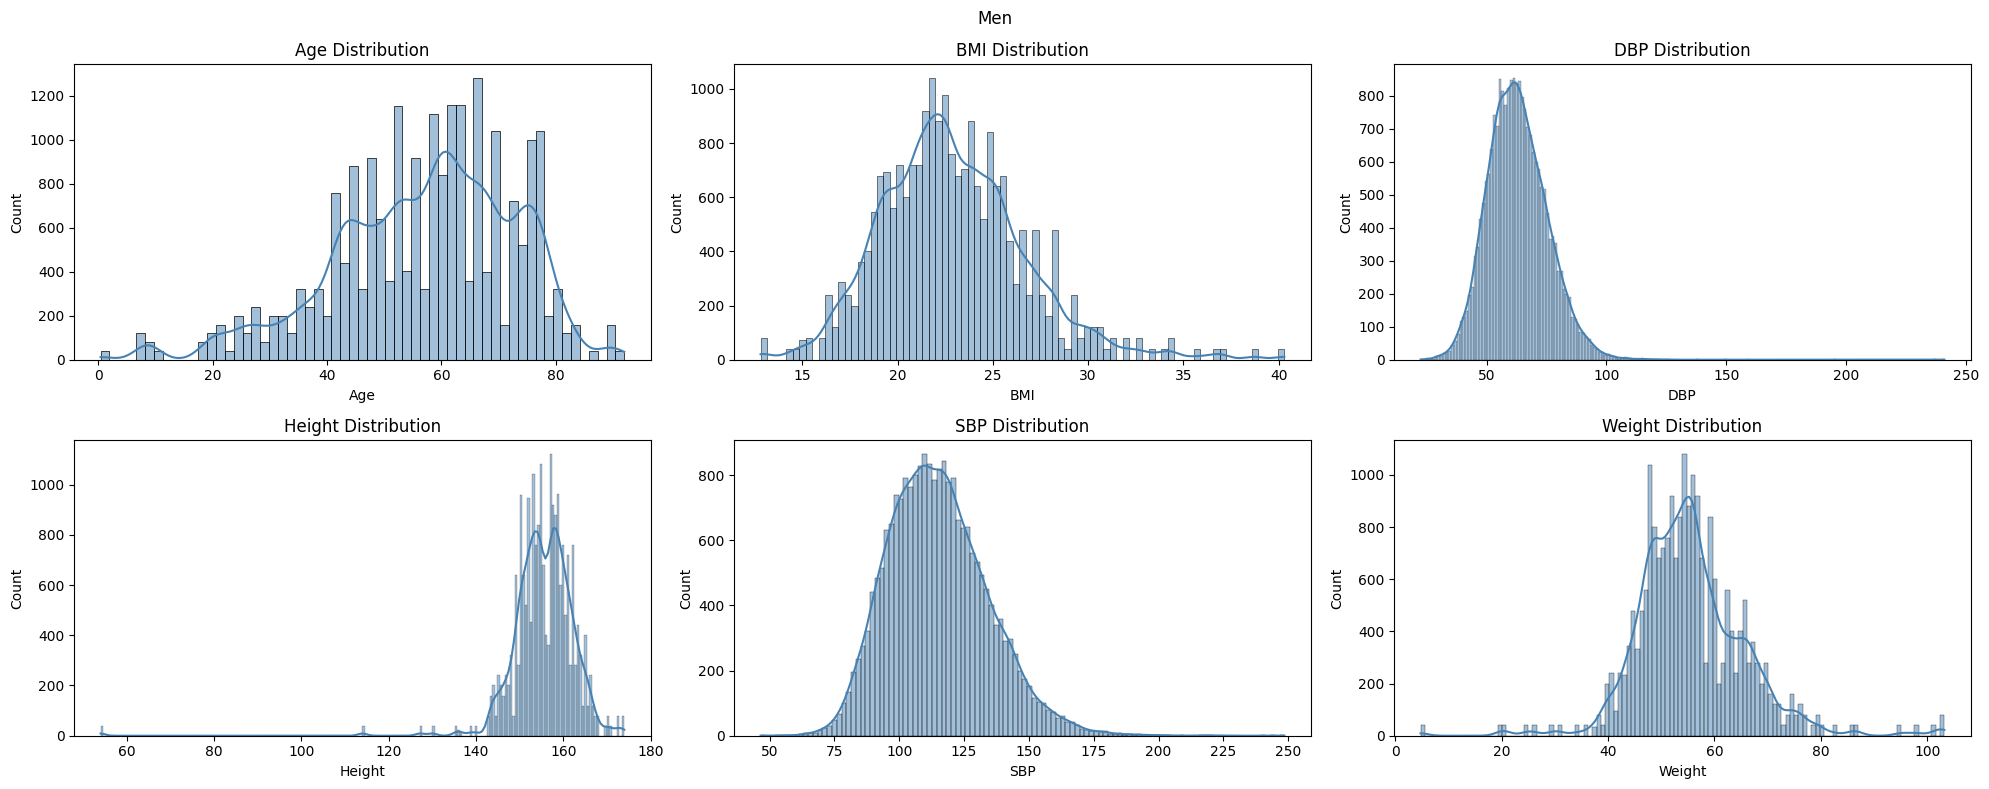

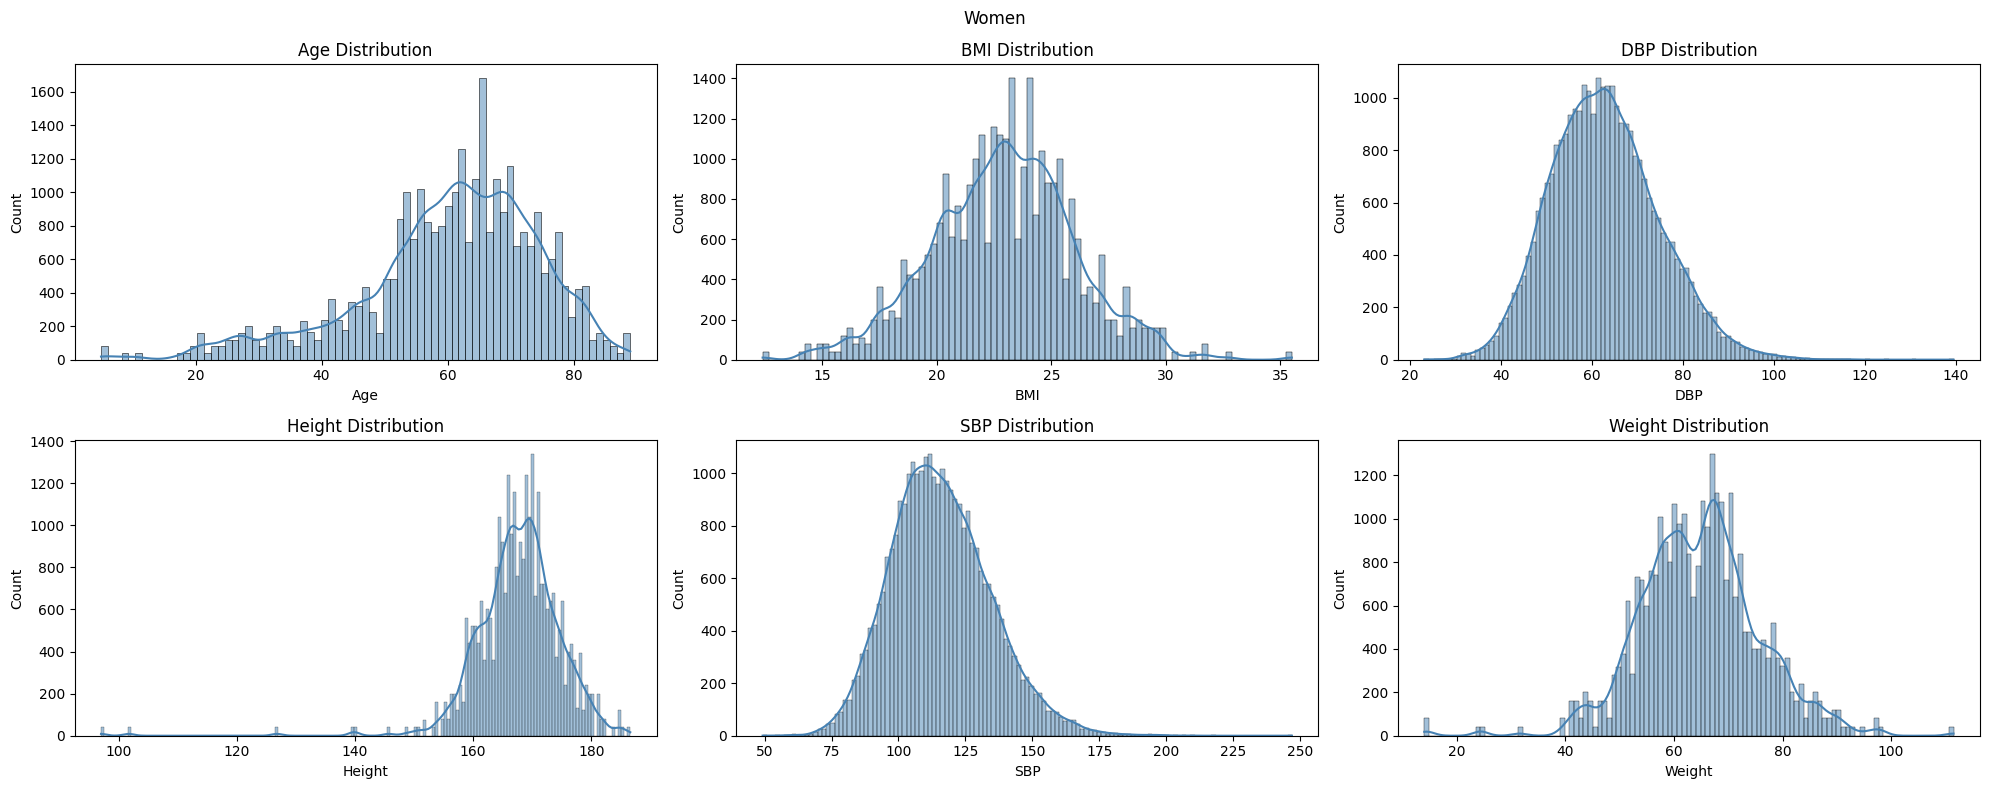

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

dfm = df_CalBased_Test[df_CalBased_Test['Gender'] == 0]
dff = df_CalBased_Test[df_CalBased_Test['Gender'] != 0]

print("Number of Men", len(dfm), "Number of Women", len(dff))

fig, ax = plt.subplots(2, 3, figsize=(20, 8))

fig.suptitle("Men")

sns.histplot(dfm['Age'], kde=True, color='steelblue', ax=ax[0, 0])
ax[0, 0].set_title("Age Distribution")
ax[0, 0].set_xlabel("Age")
ax[0, 0].set_ylabel("Count")

sns.histplot(dfm['BMI'], kde=True, color='steelblue', ax=ax[0, 1])
ax[0, 1].set_title("BMI Distribution")
ax[0, 1].set_xlabel("BMI")
ax[0, 1].set_ylabel("Count")

sns.histplot(dfm['DBP'], kde=True, color='steelblue', ax=ax[0, 2])
ax[0, 2].set_title("DBP Distribution")
ax[0, 2].set_xlabel("DBP")
ax[0, 2].set_ylabel("Count")

sns.histplot(dfm['Height'], kde=True, color='steelblue', ax=ax[1, 0])
ax[1, 0].set_title("Height Distribution")
ax[1, 0].set_xlabel("Height")
ax[1, 0].set_ylabel("Count")

sns.histplot(dfm['SBP'], kde=True, color='steelblue', ax=ax[1, 1])
ax[1, 1].set_title("SBP Distribution")
ax[1, 1].set_xlabel("SBP")
ax[1, 1].set_ylabel("Count")

sns.histplot(dfm['Weight'], kde=True, color='steelblue', ax=ax[1, 2])
ax[1, 2].set_title("Weight Distribution")
ax[1, 2].set_xlabel("Weight")
ax[1, 2].set_ylabel("Count")

plt.tight_layout()
plt.show()


fig, ax = plt.subplots(2, 3, figsize=(20, 8))

fig.suptitle("Women")

sns.histplot(dff['Age'], kde=True, color='steelblue', ax=ax[0, 0])
ax[0, 0].set_title("Age Distribution")
ax[0, 0].set_xlabel("Age")
ax[0, 0].set_ylabel("Count")

sns.histplot(dff['BMI'], kde=True, color='steelblue', ax=ax[0, 1])
ax[0, 1].set_title("BMI Distribution")
ax[0, 1].set_xlabel("BMI")
ax[0, 1].set_ylabel("Count")

sns.histplot(dff['DBP'], kde=True, color='steelblue', ax=ax[0, 2])
ax[0, 2].set_title("DBP Distribution")
ax[0, 2].set_xlabel("DBP")
ax[0, 2].set_ylabel("Count")

sns.histplot(dff['Height'], kde=True, color='steelblue', ax=ax[1, 0])
ax[1, 0].set_title("Height Distribution")
ax[1, 0].set_xlabel("Height")
ax[1, 0].set_ylabel("Count")

sns.histplot(dff['SBP'], kde=True, color='steelblue', ax=ax[1, 1])
ax[1, 1].set_title("SBP Distribution")
ax[1, 1].set_xlabel("SBP")
ax[1, 1].set_ylabel("Count")

sns.histplot(dff['Weight'], kde=True, color='steelblue', ax=ax[1, 2])
ax[1, 2].set_title("Weight Distribution")
ax[1, 2].set_xlabel("Weight")
ax[1, 2].set_ylabel("Count")

plt.tight_layout()
plt.show()


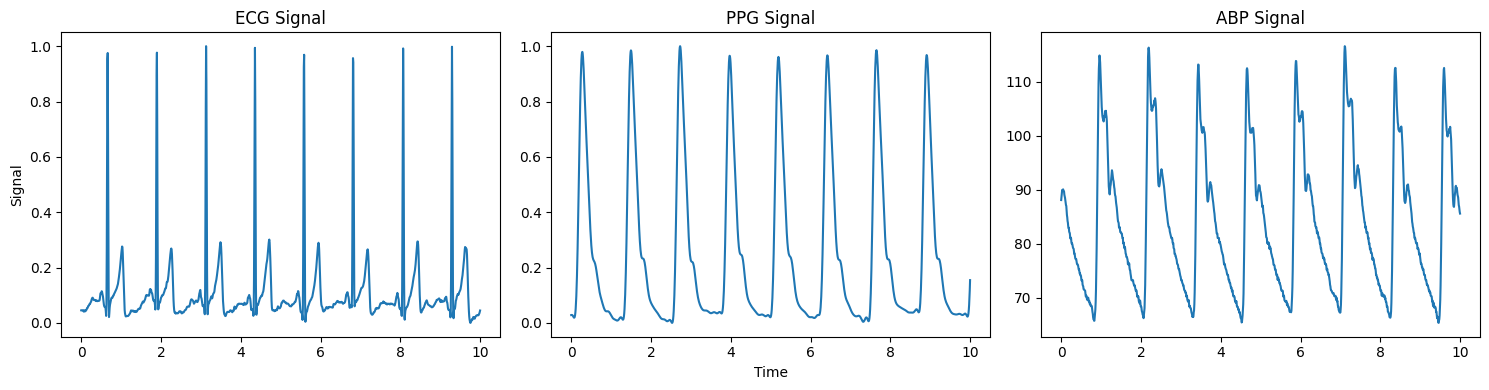

In [ ]:
import matplotlib.pyplot as plt

ecg = ECG_CalBased_Test
ppg = PPG_CalBased_Test
abp = ABP_CalBased_Test

#ECG is 51720 x 1250

sampling_rate = 125
time_per_segment = 10
num_samples_per_segment = 1250

time = np.linspace(0, time_per_segment, num_samples_per_segment)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

ax[0].plot(time, ecg[2])
ax[0].set_title('ECG Signal')
ax[0].set_ylabel('Signal')

ax[1].plot(time, ppg[2])
ax[1].set_title('PPG Signal')
ax[1].set_xlabel('Time')

ax[2].plot(time, abp[2])
ax[2].set_title('ABP Signal')

plt.tight_layout()
plt.show()

#2. Blood Pressure Prediction


In [64]:
# ============================================================
# 1. IMPORTS
# ============================================================
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm


# ============================================================
# 2. MODEL DEFINITIONS
# ============================================================

class CNN_BP(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv1d(2, 32, kernel_size=7, padding=3),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.MaxPool1d(2),

            nn.Conv1d(32, 64, kernel_size=5, padding=2),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.MaxPool1d(2),

            nn.Conv1d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)
        )

        # final layer outputs (SBP, DBP)
        self.regressor = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2)   # <—— 2 outputs now
        )

    def forward(self, x):
        x = self.features(x).squeeze(-1)
        return self.regressor(x)    # shape: (batch, 2)
# ============================================================
# 3. DATASET CLASS
# ============================================================
class PulseDBDataset(Dataset):
    def __init__(self, ecg, ppg, sbp, dbp, normalize=True):
        self.ecg = torch.tensor(ecg, dtype=torch.float32)
        self.ppg = torch.tensor(ppg, dtype=torch.float32)
        self.sbp = torch.tensor(sbp, dtype=torch.float32)
        self.dbp = torch.tensor(dbp, dtype=torch.float32)

        if normalize:
            self.ecg = (self.ecg - self.ecg.mean()) / (self.ecg.std() + 1e-8)
            self.ppg = (self.ppg - self.ppg.mean()) / (self.ppg.std() + 1e-8)

    def __len__(self):
        return len(self.sbp)

    def __getitem__(self, idx):
        x = torch.stack([self.ecg[idx], self.ppg[idx]], dim=0)
        y = torch.tensor([self.sbp[idx], self.dbp[idx]], dtype=torch.float32)
        return x, y
# ============================================================
# 4. LOAD DATA
# Replace this with your actual load_mat_file()
# ============================================================

SBP_Train = ABP_Train.max(axis=1)
DBP_Train = ABP_Train.min(axis=1)

SBP_Test  = ABP_CalBased_Test.max(axis=1)
DBP_Test  = ABP_CalBased_Test.min(axis=1)


# ============================================================
# 5. CREATE DATASETS + DATALOADERS (OPTIMIZED)
# ============================================================
batch_size = 256

train_dataset = PulseDBDataset(ECG_Train, PPG_Train, SBP_Train, DBP_Train)
test_dataset  = PulseDBDataset(ECG_CalBased_Test, PPG_CalBased_Test, SBP_Test, DBP_Test)

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=8,            # parallel data loading
    pin_memory=True,          # faster GPU transfer
    persistent_workers=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=8,
    pin_memory=True,
    persistent_workers=True
)


# ============================================================
# 6. MODEL + LOSS + OPTIMIZER + DEVICE
# ============================================================
model = CNN_BP()               # choose your model here
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


# ============================================================
# 7. AUTOMATIC MIXED PRECISION (AMP) SCALER
# ============================================================

scaler = torch.amp.GradScaler()


# ============================================================
# 8. TRAINING LOOP WITH TQDM BARS
# ============================================================
num_epochs = 10

from torch.amp import autocast, GradScaler

scaler = GradScaler(device='cuda')

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    train_pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} Training")

    for x, y in train_pbar:
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        optimizer.zero_grad(set_to_none=True)

        with autocast(device_type='cuda'):
            preds = model(x)
            loss = criterion(preds, y)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item()
        train_pbar.set_postfix(loss=f"{loss.item():.4f}")

    print(f"Epoch {epoch+1} | Train Loss: {running_loss / len(train_loader):.4f}")
# ============================================================
# 9. TESTING LOOP WITH TQDM BARS
# ============================================================
model.eval()
test_loss = 0.0

test_pbar = tqdm(test_loader, desc="Testing")

with torch.no_grad():
    for x, y in test_pbar:
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        with autocast(device_type='cuda'):
            preds = model(x)        # (batch, 2)
            loss = criterion(preds, y)

        test_loss += loss.item()
        test_pbar.set_postfix(loss=f"{loss.item():.4f}")

print(f"Final Test Loss: {test_loss / len(test_loader):.4f}")

Epoch 1/10 Training: 100%|██████████| 1819/1819 [00:21<00:00, 83.35it/s, loss=218.2653]


Epoch 1 | Train Loss: 683.5998


Epoch 2/10 Training: 100%|██████████| 1819/1819 [00:20<00:00, 88.72it/s, loss=167.1522]


Epoch 2 | Train Loss: 214.3873


Epoch 3/10 Training: 100%|██████████| 1819/1819 [00:21<00:00, 86.53it/s, loss=205.7280]


Epoch 3 | Train Loss: 207.4468


Epoch 4/10 Training: 100%|██████████| 1819/1819 [00:20<00:00, 89.48it/s, loss=156.9439]


Epoch 4 | Train Loss: 202.2344


Epoch 5/10 Training: 100%|██████████| 1819/1819 [00:19<00:00, 91.23it/s, loss=167.5093]


Epoch 5 | Train Loss: 197.4053


Epoch 6/10 Training: 100%|██████████| 1819/1819 [00:19<00:00, 91.16it/s, loss=227.9398]


Epoch 6 | Train Loss: 192.7555


Epoch 7/10 Training: 100%|██████████| 1819/1819 [00:19<00:00, 92.29it/s, loss=231.4801]


Epoch 7 | Train Loss: 188.9627


Epoch 8/10 Training: 100%|██████████| 1819/1819 [00:19<00:00, 91.57it/s, loss=231.6356]


Epoch 8 | Train Loss: 185.7093


Epoch 9/10 Training: 100%|██████████| 1819/1819 [00:20<00:00, 87.95it/s, loss=182.5923]


Epoch 9 | Train Loss: 182.4814


Epoch 10/10 Training: 100%|██████████| 1819/1819 [00:19<00:00, 91.59it/s, loss=183.3052]


Epoch 10 | Train Loss: 179.8865


Testing: 100%|██████████| 203/203 [00:02<00:00, 92.15it/s, loss=46.3405] 

Final Test Loss: 177.2101


SBP Metrics:
 ME = 1.872 mmHg
 SDE = 15.473 mmHg
 MAE = 12.071 mmHg
 R² = 0.372

DBP Metrics:
 ME = 0.012 mmHg
 SDE = 10.619 mmHg
 MAE = 7.791 mmHg
 R² = 0.301


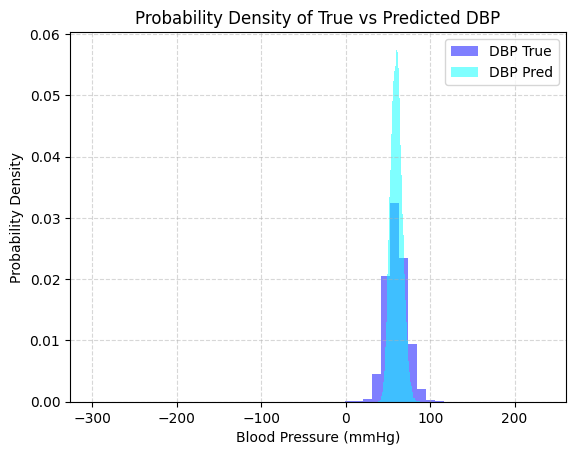

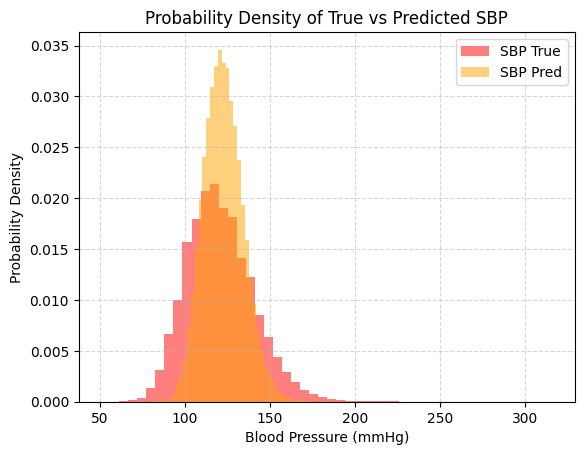

In [65]:
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

model.eval()

all_preds = []
all_true = []

# Evaluation loop (safe)
with torch.no_grad():
    for x, y in test_loader:
        # Move inputs/labels to device inside main process
        x = x.to(device)
        y = y.to(device)

        # AMP handles FP16 automatically
        with torch.amp.autocast(device_type='cuda'):
            preds = model(x)   # shape: (batch, 2)

        all_preds.append(preds.cpu())
        all_true.append(y.cpu())

# Concatenate batches
all_preds = torch.cat(all_preds, dim=0).numpy()
all_true  = torch.cat(all_true, dim=0).numpy()

# Split SBP and DBP
sbp_true, dbp_true = all_true[:,0], all_true[:,1]
sbp_pred, dbp_pred = all_preds[:,0], all_preds[:,1]

def compute_metrics(y_true, y_pred):
    errors = y_pred - y_true
    N = len(errors)

    # ME
    ME = np.mean(errors)

    # SDE
    SDE = np.std(errors, ddof=0)  # population std, divide by N

    # MAE
    MAE = np.mean(np.abs(errors))

    # R^2
    R2 = r2_score(y_true, y_pred)

    return ME, SDE, MAE, R2

sbp_ME, sbp_SDE, sbp_MAE, sbp_R2 = compute_metrics(sbp_true, sbp_pred)
dbp_ME, dbp_SDE, dbp_MAE, dbp_R2 = compute_metrics(dbp_true, dbp_pred)

print("SBP Metrics:")
print(f" ME = {sbp_ME:.3f} mmHg")
print(f" SDE = {sbp_SDE:.3f} mmHg")
print(f" MAE = {sbp_MAE:.3f} mmHg")
print(f" R² = {sbp_R2:.3f}")

print("\nDBP Metrics:")
print(f" ME = {dbp_ME:.3f} mmHg")
print(f" SDE = {dbp_SDE:.3f} mmHg")
print(f" MAE = {dbp_MAE:.3f} mmHg")
print(f" R² = {dbp_R2:.3f}")

# --- SBP and DBP Density Histogram ---
plt.figure()
plt.hist(dbp_true, bins=50, density=True, alpha=0.5, label='DBP True', color='blue')
plt.hist(dbp_pred, bins=50, density=True, alpha=0.5, label='DBP Pred', color='cyan')
plt.title('Probability Density of True vs Predicted DBP')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

plt.figure()
plt.hist(sbp_true, bins=50, density=True, alpha=0.5, label='SBP True', color='red')
plt.hist(sbp_pred, bins=50, density=True, alpha=0.5, label='SBP Pred', color='orange')
plt.title('Probability Density of True vs Predicted SBP')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#3. Generative Modeling

In [ ]:
# your code here